In [1]:
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

In [2]:
data = pd.read_pickle("../../../data/03_training_set/training_set.pkl")
X = data.drop(['new_watchers'], axis=1)
y = data['new_watchers']
s = StandardScaler()
X = s.fit_transform(X)
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.20, random_state=42)

# Wzmocnienie gradientowe

Zastosowałem dwie wersje:
- z parametrami domyślnymi dostarczonymi w scikit-learn
- z własnymi wartościami parametrów, testowane różne wersje (jedna zostawiona dla przykładu), jednak żadna z nich nie prowadziła do otrzymania wyników znacząco lepszych niż w implementacji domyślnej

In [3]:
from sklearn.ensemble import GradientBoostingRegressor
gbr_default = GradientBoostingRegressor(verbose=1)
gbr_default.fit(X_train, y_train)
y_pred_default = gbr_default.predict(X_test)

      Iter       Train Loss   Remaining Time 
         1         400.1644           12.41m
         2         376.2620           12.54m
         3         356.8874           12.54m
         4         328.6535           12.62m
         5         305.7785           12.78m
         6         287.2410           12.79m
         7         272.2149           12.60m
         8         259.9419           12.42m
         9         249.6393           12.24m
        10         240.6755           12.11m
        20         205.0413           10.79m
        30         187.3229            9.45m
        40         174.5518            8.02m
        50         163.9233            6.64m
        60         155.8432            5.31m
        70         148.2351            3.98m
        80         140.8215            2.70m
        90         137.8043            1.35m
       100         133.4542            0.00s


In [4]:
mean_squared_error(y_test, y_pred_default)

195.97317191061262

In [5]:
gbr_default.score(X_train, y_train)

0.6894046942150063

In [6]:
gbr_default.score(X_test, y_test)

0.2643954739177593

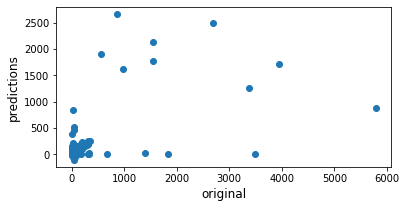

In [16]:
pred_default = gbr_default.predict(X_test).astype(int)
temp_default = y_test.values > 0
plt.scatter(y_test.values[temp_default], pred_default[temp_default])
plt.xlabel("original", fontsize=12)
plt.ylabel("predictions", fontsize=12)
plt.axis('scaled')
plt.show()

In [8]:
gbr_custom = GradientBoostingRegressor(verbose=1, 
                                       max_depth=5, 
                                       learning_rate=0.01,
                                       min_samples_split=3,
                                       n_estimators=100)
gbr_custom.fit(X_train, y_train)
y_pred_custom = gbr_custom.predict(X_test)

      Iter       Train Loss   Remaining Time 
         1         424.6388           22.73m
         2         419.7055           23.17m
         3         414.8703           22.61m
         4         410.1314           21.80m
         5         405.4866           21.27m
         6         400.9342           20.91m
         7         396.4723           20.59m
         8         392.0992           20.27m
         9         387.8130           19.93m
        10         383.6121           19.68m
        20         345.9282           17.78m
        30         315.0355           15.69m
        40         289.5897           13.81m
        50         268.5569           11.62m
        60         251.1144            9.18m
        70         236.4238            6.60m
        80         223.8489            4.25m
        90         211.9386            2.07m
       100         201.1521            0.00s


In [9]:
mean_squared_error(y_test, y_pred_custom)

192.53966880386696

In [10]:
gbr_custom.score(X_train, y_train)

0.5318476733807187

In [11]:
gbr_custom.score(X_test, y_test)

0.27728346466167375

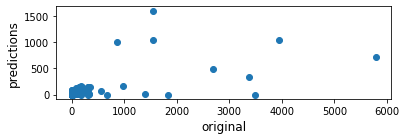

In [17]:
pred_custom = gbr_custom.predict(X_test).astype(int)
temp_custom = y_test.values > 0
plt.scatter(y_test.values[temp_custom], pred_custom[temp_custom])
plt.xlabel("original", fontsize=12)
plt.ylabel("predictions", fontsize=12)
plt.axis('scaled')
plt.show()

In [13]:
from joblib import dump
dump(gbr_default, 'gbr_default.joblib')
dump(gbr_custom, 'gbc_custom.joblib')

['gbc_custom.joblib']